## OpenFDA PMA Queries

These functions will retreive information about PMA devices from OpenFDA.  You can see the list of fields and definitions on the [OpenFDA website](https://open.fda.gov/apis/device/pma/searchable-fields/).

In [1]:
import os
import random
import requests

api_key = 'IuSORFFEOUDgU0GmtCd0FcbgQige1Y7DDx26Hyna'

# Get the pma record for a particular supplement
def get_pma_supplement(pma_number, supplement_number):
    url = f'https://api.fda.gov/device/pma.json?api_key={api_key}&search=pma_number:{pma_number}+AND+supplement_number:{supplement_number}&limit=1'
    r = requests.get(url)
    if r.status_code != 200: 
        return {}
    else:
        return r.json()['results'][0]

# Get the original pma record
def get_pma_original(pma_number):
    url = f'https://api.fda.gov/device/pma.json?api_key={api_key}&search=pma_number:{pma_number}&sort=decision_date&limit=1'
    r = requests.get(url)
    if r.status_code != 200: 
        return {}
    else:
        return r.json()['results'][0]
    
# Get the oldest device in a particular product code class
def get_first_pma_in_class(product_code):
    url = f'https://api.fda.gov/device/pma.json?api_key={api_key}&search=product_code:{product_code}&sort=decision_date&limit=1'
    r = requests.get(url)
    if r.status_code != 200: 
        return {}
    else:
        return r.json()['results'][0]
# 
def get_all_pma_in_class(product_code):
    #200
    url = f'https://api.fda.gov/device/pma.json?api_key={api_key}&search=product_code:{product_code}&sort=decision_date&limit=200'
    r = requests.get(url)
    if r.status_code != 200: 
        return {}
    else:
        return r.json()["results"]

### Get PMA Supplement

Fetches a particular PMA supplement.

In [2]:
get_pma_supplement('P820018','S001')

{'pma_number': 'P820018',
 'supplement_number': 'S001',
 'applicant': 'St. Jude Medical, Inc.',
 'street_1': '15900 VALLEY VIEW Court',
 'street_2': '',
 'city': 'SYLMAR',
 'state': 'CA',
 'zip': '91342',
 'zip_ext': '',
 'generic_name': 'Implantable pulse generator, pacemaker (non-CRT)',
 'trade_name': 'AUTIMA(TM) MODEL 2251 & MODEL 2600',
 'product_code': 'LWP',
 'advisory_committee': 'CV',
 'advisory_committee_description': 'Cardiovascular',
 'supplement_type': '',
 'supplement_reason': '',
 'expedited_review_flag': 'N',
 'date_received': '1983-02-22',
 'decision_date': '1983-06-06',
 'docket_number': '',
 'decision_code': 'APPR',
 'ao_statement': '',
 'openfda': {'registration_number': ['3004593495',
   '3004105270',
   '2135338',
   '2649622',
   '2124215',
   '3008483389',
   '3008159616',
   '3005334138',
   '3009220482',
   '9614453',
   '2032521',
   '3008973940',
   '3008494315',
   '3007566237',
   '2017865',
   '1450662',
   '3009380063',
   '2182208',
   '1000165971',
   '

### Get Original PMA Record
Fetches the original PMA record (i.e. S000)

In [3]:
get_pma_original('P820018')

{'pma_number': 'P820018',
 'supplement_number': '',
 'applicant': 'St. Jude Medical, Inc.',
 'street_1': '15900 VALLEY VIEW Court',
 'street_2': '',
 'city': 'SYLMAR',
 'state': 'CA',
 'zip': '91342',
 'zip_ext': '',
 'generic_name': 'Implantable pulse generator, pacemaker (non-CRT)',
 'trade_name': 'AUTIMA(TM) MODEL 2251 & MODEL 2600',
 'product_code': 'LWP',
 'advisory_committee': 'CV',
 'advisory_committee_description': 'Cardiovascular',
 'supplement_type': '',
 'supplement_reason': '',
 'expedited_review_flag': 'N',
 'date_received': '1982-03-30',
 'decision_date': '1983-02-10',
 'docket_number': '83M-0055',
 'fed_reg_notice_date': '1983-03-11',
 'decision_code': 'APWD',
 'ao_statement': '',
 'openfda': {'registration_number': ['3004593495',
   '3004105270',
   '2135338',
   '2649622',
   '2124215',
   '3008483389',
   '3008159616',
   '3005334138',
   '3009220482',
   '9614453',
   '2032521',
   '3008973940',
   '3008494315',
   '3007566237',
   '2017865',
   '1450662',
   '300938

In [4]:
get_first_pma_in_class('LWP')

{'pma_number': 'P780009',
 'supplement_number': '',
 'applicant': 'MEDTRONIC CARDIAC RHYTHM DISEASE MANAGEMENT',
 'street_1': '8200 CORAL SEA STREET N.E.',
 'street_2': '',
 'city': 'MOUNDS VIEW',
 'state': 'MN',
 'zip': '55112',
 'zip_ext': '',
 'generic_name': 'Implantable pulse generator, pacemaker (non-CRT)',
 'trade_name': 'BYREL PROGRAMABLE PACEMAKER',
 'product_code': 'LWP',
 'advisory_committee': 'CV',
 'advisory_committee_description': 'Cardiovascular',
 'supplement_type': '',
 'supplement_reason': '',
 'expedited_review_flag': 'N',
 'date_received': '1978-11-20',
 'decision_date': '1979-03-27',
 'docket_number': '',
 'fed_reg_notice_date': '1979-08-03',
 'decision_code': 'APWD',
 'ao_statement': '',
 'openfda': {'registration_number': ['3004593495',
   '3004105270',
   '2135338',
   '2649622',
   '2124215',
   '3008483389',
   '3008159616',
   '3005334138',
   '3009220482',
   '9614453',
   '2032521',
   '3008973940',
   '3008494315',
   '3007566237',
   '2017865',
   '145066

In [24]:
lzs = get_all_pma_in_class("LZS")
mcm = get_all_pma_in_class("MCM")
mzo = get_all_pma_in_class("MZO")
drf = get_all_pma_in_class("DRF")
ozp = get_all_pma_in_class("OZP")
oyc = get_all_pma_in_class("OYC")
mds = get_all_pma_in_class("MDS")
mvk = get_all_pma_in_class("MVK")
lpb = get_all_pma_in_class("LPB")
lyj = get_all_pma_in_class("LYJ")
lsz = get_all_pma_in_class("LSZ")
muz = get_all_pma_in_class("MUZ")
lom = get_all_pma_in_class("LOM")
nqr = get_all_pma_in_class("NQR")
cga = get_all_pma_in_class("CGA")
pqf = get_all_pma_in_class("PQF")
nct = get_all_pma_in_class("NCT")
mma = get_all_pma_in_class("MMA")
pgq = get_all_pma_in_class("PGQ")


In [26]:
def aoStatement(productClass):
    for product in productClass:
        if(product["ao_statement"]!=""):
            print(product["ao_statement"])
            print(product["decision_date"])

In [27]:
aoStatement(mcm)

APPROVAL FOR DISTRIBUTION OF THE NUCLEUS 22 CHANNEL COCHLEAR IMPLANT FOR PRELINGUISTICALLY & PERILINGUISTICALLY DEAFENED ADULTS
1995-07-28
APPROVAL FOR NUCLEUS 22-CHANNEL COCHLEAR IMPLANT FOR USE IN AN EXPANDED ADULT POPULATION.
1995-08-21
APPROVAL FOR MODIFICATION TO THE NEGATIVE BATTERY TERMINAL ON THE SPECTRA-22 AND MINI SPEECH PROCESSORS
1995-08-24
APPROVAL FOR MODIFICATION TO THE NEGATIVE BATTERY TERMINAL ON THE SPECTRA-22 AND MINI SPEECH PROCESSORS
1995-08-24
APPROVAL FOR THE INTRODUCTION OF A DPI TRIGGER OUT CABLE
1995-08-31
APPROVAL FOR THE INTRODUCTION OF A DPI TRIGGER OUT CABLE
1995-08-31
APPROVAL TO MAKE CHANGES TO THE MINI 22 COCHLEAR IMPLANT INTEGRATED CIRCUIT (IC) TEST SOFTWARE (K15001) IN ORDER TO ADD SEVERAL TEST OF IMPORVED QUALITY ASSURANCE. ONE MODIFICATION YOU HAVE REQUESTED IS TO ADD A POWER SUPPLY LEAKAGE TEST TO AID IN ENSURING THAT THE BIPOLAR TANTALUM POWER SUPPLY CAPACITOR IS NOT ASSEMBLED IN THE REVERSE DIRECTION. THE SECOND MODIFICATION YOU HAVE REQUESTED IS

In [28]:
aoStatement(mzo)

Approval for the Home Access(R) Hepatitis C Check(SM) and Hepatitis C Check(SM) Express.  This device is indicated for home use for collection of a dried blood spot speciment by finger-stick, and is indicated for anonymous testing for antibody to hepatitis C virus (HCV) in adults, eighteen years or older, who may have been exposed to HCV through transfusion or organ transplant before 1992, who may have injected non-prescription durgs, or who were exposed to infected needles or had sexual contacts with HCV infected individuals.
1999-04-28
As a final packaging option, the outer packaging of the Hepatitis C Check product may be assembled in a Softpak package or the currently approved paperboard packaging when shipped directly to clients.
2000-04-12
APPROVAL FOR A MANUFACTURING SITE LOCATED AT HOME ACCESS HEALTH CORPORATION, HOFFMAN ESTATES, ILLINOIS.
2001-03-21
APPROVAL FOR THE VITROS IMMUNODIAGNOSTIC PRODUCTS ANTI-HCV REAGENT PACK AND VITROS IMMUNODIAGNOSTIC PRODUCTS ANTI-HCV CALIBRATOR.

In [30]:
aoStatement(drf)

Approval for the 7 Fr and 8 Fr braided tip version of the Diagnostic/Ablation Deflectable Tip Catheter (with and without temperature sensors).
1998-07-22
Approval for expanded indications for use for the 6 Fr and 7 Fr Cordis Webster Diagnostic/Ablation Deflectable Tip Catheters and interface cables.  In addition to the previously approved indications for interruption of accessory AV conduction pathways associated with tachycardia, the treatment of AV nodal reentrant tachycardia (AVNRT), and creation of complete AV nodal block in patients with a difficult to control ventricular response to an atrial arrhythmia, your ablation system is now approved to treat patients with the following Indications for Use: 1) Pediatric Patients (age 4 years or older); 2) Patients with Persistent Junctional Reciprocating Tachycardia (PJRT); and 3) Patients with Mahaim Fibers.
1999-01-26
Approval for the 7 Fr and 8 Fr catheters incorporating a 5mm tip electrode.  The device, as modified, will be marketed un

In [31]:
aoStatement(ozp)

MiniMed 670G SystemThe Medtronic MiniMed 670G system is intended for continuous delivery of basal insulin (at user selectable rates) and administration of insulin boluses (in user selectable amounts) for the management of Type 1 diabetes mellitus in persons, fourteen years of age and older, requiring insulin as well as for the continuous monitoring and trending of glucose levels in the fluid under the skin. The MiniMed 670G System includes SmartGuard technology, which can be programmed to automatically adjust delivery of basal insulin based on Continuous Glucose Monitor sensor glucose values, and can suspend delivery of insulin when the sensor glucose value falls below or is predicted to fall below predefined threshold values.The Medtronic MiniMed 670G System consists of the following devices: MiniMed 670G insulin pump, the Guardian Link (3) Transmitter, the Guardian Sensor (3), One-Press Serter, and the Contour NEXT Link 2.4 Glucose Meter. The system requires a prescription.The Guardi

In [32]:
aoStatement(oyc)

APPROVAL FOR THE ANIMAS VIBE SYSTEM. THIS DEVICE IS INDICATED FOR:THE ANIMAS® VIBE¿ SYSTEM CONSISTS OF THE ANIMAS® VIBE¿ INSULIN PUMP PAIRED WITH THE DEXCOM G4 PLATINUM SENSOR AND TRANSMITTER.THE ANIMAS® VIBE¿ INSULIN PUMP IS INDICATED FOR CONTINUOUS SUBCUTANEOUS INSULIN INFUSION FOR THE MANAGEMENT OF INSULIN-REQUIRING DIABETES. IT CAN BE USED SOLELY FOR CONTINUOUS INSULIN DELIVERY AND AS PART OF THE ANIMAS® VIBE¿ SYSTEM TO RECEIVE AND DISPLAY CONTINUOUS GLUCOSE MEASUREMENTS FROM THE DEXCOM G4 PLATINUM SENSOR AND TRANSMITTER.THE ANIMAS® VIBE¿ SYSTEM'S CONTINUOUS GLUCOSE MONITORING (CGM) IS INDICATED FOR DETECTING TRENDS AND TRACKING PATTERNS IN PERSONS (AGE 18 AND OLDER) WITH DIABETES, AND IS INTENDED TO COMPLEMENT, NOT REPLACE, INFORMATION OBTAINED FROM STANDARD HOME GLUCOSE MONITORING DEVICES. CGM AIDS IN THE DETECTION OF EPISODES OF HYPERGLYCEMIA AND HYPOGLYCEMIA, FACILITATING BOTH ACUTE AND LONG-TERM THERAPY ADJUSTMENTS, WHICH MAY MINIMIZE THESE EXCURSIONS. INTERPRETATION OF RESULT

In [33]:
aoStatement(mds)

The device is intended to continuously record interstitial glucose levels in persons with diabetes mellitus.  This information is intended to supplement, not replace blood glucose information obtained using standard home glucose monitoring devices.  The information collected by the device may be downloaded and displayed on a computer and review by healthcare professionals.  This information may allow identification of patterns of glucose level excursions above or below the desired range, facilitating therapy adjustments, which may minimize these excursions.
1999-06-15
APPROVAL FOR A NEW VERSION OF SOFTWARE.
2002-02-20
APPROVAL FOR AN ADDITIONAL MANUFACTURING FACILITY LOCATED AT MEDTRONIC MIMIMED, NORTHRIDGE, CALIFORNIA.
2002-06-25
APPROVAL FOR A MANUFACTURING SITE CHANGE AND A DESIGN MODIFICATION OF THE GLUCOSE SENSOR COMPONENT OF THE CONTINUOUS GLUCOSE MONITORING SYSTEM.
2002-09-05
APPROVAL FOR THE GUARDIAN TELEMETERED GLUCOSE MONITORING SYSTEM (TGMS).  THE DEVICE IS INDICATED FOR CON

In [34]:
aoStatement(mvk)

APPROVAL FOR THE WCD 2000 SYSTEM.  THIS DEVICE IS INDICATED FOR ADULT PATIENTS WHO ARE AT RISK FOR SUDDEN CARDIAC ARREST AND EITHER ARE NOT CANDIDATES FOR OR REFUSE AN IMPLANTABLE DEFIBRILLATOR.
2001-12-18
APPROVAL FOR A NEW TRADE NAME FOR THE WCD DEVICE.  THE DEVICE, AS MODIFIED, WILL BE MARKETED UNDER THE TRADE NAME LIFEVEST AND IS INDICATED FOR ADULT PATIENTS WHO ARE AT RISK FOR SUDDEN CARDIAC ARREST AND EITHER ARE NOT CANDIDATES FOR OR REFUSE AN IMPLANTABLE DEFIBRILLATOR.
2002-03-20
APPROVAL FOR MODIFICATIONS TO THE WCD MONITOR (P010030/S001) AND ELECTRODE BELT/CHEST GARMENT SYSTEM (P010030/S003).  THE SYSTEM, AS MODIFIED, WILL BE MARKETED UNDER THE TRADE NAME LIFEVEST WCD 3000 SYSTEM AND IS INDICATED FOR ADULT PATIENTS WHO ARE AT RISK FOR SUDDEN CARDIAC ARREST AND EITHER ARE NOT CANDIDATES FOR OR REFUSE AN IMPLANTABLE DEFIBRILLATOR.
2002-10-09
APPROVAL FOR MODIFICATIONS TO THE WCD MONITOR (P010030/S001) AND ELECTRODE BELT/CHEST GARMENT SYSTEM (P010030/S003).  THE SYSTEM, AS MODIFI

In [35]:
aoStatement(lpb)

APPROVAL FOR EPT-1000 GRAPHICS SOFTWARE
1995-08-14
RELOCATION OF ONE OF THE CONTRACT MANUFACTURERS (SEAMED CORPORATION) WHO MANUFACTURERS THE EPT-1000 RF GENERATOR
1995-08-14
APPROVAL FOR AN ALTERNATE CONFIGURATION OF THE EPT-1000 CARDIAC ABLATION CONTROLLER WHICH INCORPORATES A TEMPERATURE CONTROL FEATURE
1995-11-08
APPROVAL OF THE ABLATION TRACKR SOFTWAE FOR USE WITH THE ATAKR RF CATHETER ABLATION GENERATOR SYSTEM
1996-02-22
APPROVAL FOR THE ADDITION OF THE RF PERFORMER SERIES OF CARDIAC ABLATION CATHETERS FOR THE ATAKR RFCA SYSTEM
1996-06-11
APPROVAL FOR A MANUFACTURING SITE LOCATED AT MEDTRONIC CARDIORHYTHM, SUNNYVALE, CA
1996-09-06
APPROVAL FOR THE ADDTION OF A GRAPH SHOWING THE RELATIONSHIP OF INITIAL ATAKR POWER OUTPUT TO TEMPERATURE SET POINT DURING THE RAMP UP PERIOD IN TEMPERATURE CONTROL MODE AND THE ADDTION OF A WARNING STATEMENT REARDING PROPER CONNECTION TECHNIQURES WHEN UTILIZING THE ATAKR SYSTEM WITH OTHER CATHETER LABORATORY EQUIPMENT
1996-09-30
APPROVAL FOR AN ALTERNA

In [36]:
aoStatement(lyj)

Approval for the NeuroCybernetic Prosthesis (NCP(R)) System which includes the Model 100 NCP Generator, the Model 300 Series NCP Vagus Nerve Stimulation Lead, the Model 400 Tunneling Tool, and NCP System Accessories.
1997-07-16
Approval for a manufacturing site located at Texcel, Inc., 55 Deer Park Drive, E. Longmeadow, MA  01028.
1997-08-21
Approval for the modified NCP(R) System Lead Connector Boot Design and the NCP(R) System Programming Software Version 4.1.
1997-10-09
Approval for the modified NCP(R) System Lead Connector Boot Design and the NCP(R) System Programming Software Version 4.1.
1997-10-09
Approval for the Model 250 NCP Software Version 5.0 modification.
1997-11-21
Approval for NCP(R) Model 100C Pulse Generator with modifications to the microcontroller and battery.  The device, as modified, will be marketed under the trade name NCP(R) Model 100C Pulse Generator ans is indicated for use as an adjunctive therapy in reducing the frequency of seizures in adults and adolescen

In [37]:
aoStatement(lsz)

APPPROVAL FOR AN ENDOTRACHEAL TUBE ADAPTER FOR USE WITH THE MODEL 203 LIFE PULSE HIGH FREQUENCY JET VENTILATOR. THE ENDOTRACHEAL TUBE ADAPTOR WILL BE MARKETED UNDER THE NEW TRADE NAME AS THE "LIFEPORT" ENDOTRACHEAL TUBE ADAPTER
1995-12-18
APPROVAL FOR AN PROXIMAL MONITORING ENDOTRACHEAL TUBE ADAPTER FOR USE WITH THE ADULT STAR MODEL 1010 ULTRAHIGH FREQUENCY VENTILATOR - THE PROXIMAL MONITORING ADAPTER WILL BE MARKETED UNDER THE NEW TRADE NAME AS THE "PROXIMAL MONITORING ADAPTER"
1995-12-28
APPROVAL FOR REPLACEMENT FLEXIBLE TUBING AND HEATED WIRE ACCESSORIES AND IS INDICATED FOR USE WITH MDOE 3100 AND 3100A HIGH FREQUENCY OSCILLATORY VENTILATOR.
1996-12-20
APPROVAL FOR A GAS PRESSURE REGULATOR ADJUSTOR SCREW CHANGE.
1997-05-02
APPROVAL FOR A LABELING CHANGE TO INCLUDE AN ADDITIONAL WARNING ADVISING AGAINST TROUBLESHOOTING WHILE THE VENTILATOR IS IN OPERATION.
1997-05-16
APPROVAL FOR A MANUFACTURING SITE AT NELLCOR PURITAN BENNETT, 2200 FARADAY AVE., CARLSBAD, CA.
1997-06-24
APPROVAL FOR

In [38]:
aoStatement(muz)

APPROVAL FOR THE VNS THERAPY SYSTEM.  THE DEVICE IS INDICATED FOR THE ADJUNCTIVE LONG-TERM TREATMENT OF CHRONIC OR RECURRENT DEPRESSION FOR PATIENTS 18 YEARS OF AGE OR OLDER WHO ARE EXPERIENCING A MAJOR DEPRESSIVE EPISODE AND HAVE NOT HAD AN ADEQUATE RESPONSE TO FOUR OR MORE ADEQUATE ANTIDEPRESSANT TREATMENTS.
2005-07-15
ADDITION OF A REWORK STEP FOR SOLDERING OPERATIONS OF LIGHT EMITTING DIODES (LEDS) TO PRINTED CIRCUIT BOARDS (PCBS).
2011-12-02
TWO REVISIONS TO THE SOFTWARE USED IN THE AUTOMATED FUNCTIONAL TEST SYSTEM (AFT) FOR THE VNS THERAPY SYSTEM PULSE GENERATORS.
2011-12-23
CHANGES TO THE PARALLEL GAP WELDING STEP DURING THE MANUFACTURING OF THE LEADS FOR THE DEVICE.
2012-01-18
THREE CHANGES TO THE MANUFACTURING PROCESS FOR THE PULSE GENERATOR IN THE DEVICE.
2012-02-01
INTRODUCTION OF WORK INSTRUCTIONS TO ALLOW REWORK AND REPLACEMENT OF COMPONENTS IN THE VNS THERAPY SYSTEM.
2012-02-06
INTRODUCTION OF AN ADDITIONAL RECEIVING INSPECTION FOR THE TORQUE WRENCH THAT IS PACKAGED WITH 

In [39]:
aoStatement(lom)

APPROVAL FOR A CHANGE IN THE MANUFACTURING PROCESS FROM THE USE OF RECALCIFIED ANTI-HBE POSITIVE HUMAN PLASMA FROM ONE DONOR TO THE USE OF AN ALTERNATE SOURCE OF ANTI-HBE POSITIVE PLASMA FOR BEAD COATING
1996-02-16
APPROVAL TO MODIFY THE PRODUCT LABELING TO ENHANCE THE SAFETY IN THE USE OF THE ABBOTT HBE (RDNA) EIA. THE LIMITATIONS SECTION WILL BE MODIFIED TOSTATE THAT "SAMPLES CONTAINING RHEUMATOID FACTOR AMY DEMONSTRATE FALSELY ELEVATED VALUES IN THE HBEAG ASSAY," AND THE INTERPRETATION OF RESULTS SECTION WILL BE MODIFIED TOSTATE THAT "IT IS RECOMMENDED THAT PATIENTS BE SCREENED FOR THE PRESENCE OF HBSAG PRIOR TO BEING EVALUATED FOR THE PRESENCE OF HBEAG."
1996-05-17
APPROVAL FOR THE VITROS IMMUNODIAGNOSTIC PRODUCTS ANTI-HBS REAGENT PACK AND CALIBRATORS.  THE DEVICE IS INDICATED FOR:  THE QUALITATIVE IN VITRO DETERMINATION OF TOTAL ANTIBODY TO HEPATITIS B SURFACE ANTIGEN (ANTI-HBS) IN HUMAN SERUM USING THE VITROS ECI IMMUNODIAGNOSTIC SYSTEM.  ASSAY RESULTS MAY BE USED AS AN AID IN TH

In [40]:
aoStatement(nqr)

APPROVAL FOR THE DURASEAL DURAL SEALANT SYSTEM.  THE DEVICE IS INDICATED FOR USE AS AN ADJUNCT TO SUTURED DURAL REPAIR DURING CRANIAL SURGERY TO PROVIDE WATERTIGHT CLOSURE.  DURASEAL SHOULD ONLY BE USED WITH AUTOLOGOUS DURAPLASTY MATERIAL.
2005-04-07
APPROVAL FOR AN EXTENSION OF THE PRODUCT EXPIRATION DATE TO 18 MONTHS.
2005-10-25
APPROVAL FOR CHANGING THE PACKAGE CONFIGURATIONS TO INCLUDE A 1 UNIT CONFIGURATION, IDENTIFIED AS "1-UP".
2005-12-13
APPROVAL FOR: 1) USE OF NOF CORPORATION AS AN ALTERNATE VENDOR FOR FUNCTIONALIZING RAW PEG-POLYOL MATERIAL TO PEG-SG FOR USE IN THE DURASEAL DURAL SEALANT PRODUCT, AND 2) IMPLEMENTATION OF AN IN-PROCESS PARTICLE SIZE INSPECTION STEP PRIOR TO THE MILLING STEP.
2006-08-02
APPROVAL FOR A STERILIZATION SITE LOCATED AT BEAMONE LLC, LIMA, OHIO.
2006-09-15
APPROVAL FOR USE OF DATA COLLECTED AT ELEVATED TEMPERATURES (I.E., ACCELERATED AGING DATA) TO DETERMINE FUTURE SHELF LIFE CLAIMS FOR THE DEVICE, APPLYING A CORRELATION FACTOR OF Q10=3.  THE USE OF T

In [41]:
aoStatement(cga)

APPROVAL FOR THE ADDITION OF A PRESERVATIVE IN THE AUTOSENSORS.
2001-05-03
APPROVAL FOR MODIFICATIONS TO THE AUTOSENSOR PACKAGING.
2001-05-22
CHANGE IN MANUFACTURING METHODS AND PROCEDURES TO UPGRADE FROM A MANUAL PROCESS AT CYGNUS, INC. TO AN EXPANDED AUTOMATED PROCESS AT CORIUM MANUFACTURING GROUP.
2001-08-03
APPROVAL FOR MODIFICATIONS TO THE LABELING FOR THE GLUCOWATCH(R) AUTOMATIC GLUCOSE BIOGRAPHER.
2001-08-28
CHANGE IN SUPPLIER OF GLUCOSE OXIDASE FOR THE AUTOSENSOR TO TOYOBO RESEARCH CENTER CO. LTD.
2001-09-04
APPROVAL FOR THE MANUFACTURING FACILITY LOCATED AT CYGNUS, INC., REDWOOD, CALIFORNIA.
2001-10-25
APPROVAL FOR THE GLUCOWATCH ANALYZER SOFTWARE PACKAGE AS AN ACCESSORY TO THE GLUCOWATCH BIOGRAPHER.
2001-11-30
APPROVAL FOR EXTENDED SHELF LIFE OF THE QC TEST SOLUTION FROM 6 MONTHS TO 24 MONTHS.
2001-11-30
CHANGE IN THE SAMPLING PLAN FOR INCOMING AND IN-PROCESS COMPONENTS AND FINISHED PRODUCTS.
2002-02-04
APPROVAL FOR MODIFICATIONS TO THE ELECTRICAL HARDWARE AND SOFTWARE OF THE

In [42]:
aoStatement(pqf)

Approval for the Dexcom G5 Mobile Continuous Glucose Monitoring System (Dexcom G5) is a glucose monitoring system indicated for the management of diabetes in persons age 2 years and older. The Dexcom G5 is designed to replace fingerstick blood glucose testing for diabetes treatment decisions. Interpretation of the Dexcom G5 results should be based on the glucose trends and several sequential readings over time. The Dexcom G5 also aids in the detection of episodes of hyperglycemia and hypoglycemia, facilitating both acute and long-term therapy adjustments. The Dexcom G5 is intended for single patient use and requires a prescription.The G5 Mobile Continuous Glucose Monitoring System consists of the following devices: sensor, transmitter (with onboard algorithm), receiver, and mobile app. The sensor is a small flexible metal filament that is inserted into subcutaneous tissue where it enzymatically generates electrical current in response to the presence of glucose. The transmitter is conn

In [43]:
aoStatement(nct)

APPROVAL FOR THE GLUCOWATCH(R) AUTOMATIC GLUCOSE BIOGRAPHER.  THE DEVICE IS INDICATED FOR: THE GLUCOWATCH(R) AUTOMATIC GLUCOSE BIOGRAPHER IS A GLUCOSE MONITORING DEVICE INDICATED FOR DETECTING TRENDS AND TRACKING PATTERNS IN GLUCOSE LEVELS IN ADULTS (AGE 18 AND OLDER) WITH DIABETES.  THE DEVICE IS INTENDED FOR USE BY PATIENTS AT HOME AND IN HEALTH CARE FACILITIES.  THE GLUCOWATCH BIOGRAPHER IS INDICATED FOR USE AS AN ADJUNCTIVE DEVICE TO SUPPLEMENT, NOT REPLACE, INFORMATION OBTAINED FROM STANDARD HOME GLUCOSE MONITORING DEVICES.  THE BIOGRAPHER IS INDICATED FOR USE IN THE DETECTION AND ASSESSMENT OF EPISODES OF HYPERGLYCEMIA AND HYPOGLYCEMIA, FACILITATING BOTH ACUTE AND LONG-TERM THERAPY ADJUSTMENTS, WHICH MAY MINIMIZE THESE EXCURSIONS.  INTERPRETATION OF BIOGRAPHER RESULTS WHOULD BE BASED ON THE TRENDS AND PATTERNS SEEN WITH SEVERAL SEQUENTIAL READINGS OVER TIME.
2001-03-22
CHANGE TO THE MANUFACTURING PROCESS OF THE GLUCOWATCH BIOGRAPHER AUTOSENSOR TO ADD A SECONDARY VISUAL INSPECTION

In [44]:
aoStatement(mma)

APPROVAL FOR THE NELLCOR N-400 FETAL OXYGEN SATURATION MONITORING SYSTEM (OXIFIRST(TM) SYSTEM).
2000-05-12
APPROVAL FOR THE COROMETRICS MODEL 120 F-SERIES MATERNAL/FETAL MONITOR WITN INTEGRATED FETAL OXYGEN SATURATION MONITORING, COROMETRICS FETAL PATIENT MOFULE, AND THE NELLCOR OXIFIRST(TM) FS14 SENSOR.  THE 120 F-SERIES SYSTEM CONTINUOUSLY MONITORS INTRAPARTUM FETAL OXYGEN SATURATION (FSPO2) AND IS INDICATED AS AN ADJUNCT TO FETAL HEART RATE (FHR) MONITORING IN THE PRESENCE OF A NONREASSURING FETAL HEART RATE PATTERN.  IT SHOULD ONLY BE USED AFTER MATERNAL MEMBRANES HAVE RUPTURED AND ON A SINGLETON FETUS IN VERTEX PRESENTATION WITH A GESTATIONAL AGE GREATER THAN OR EQUAL TO 36 WEEKS.
2001-02-09
APPROVAL FOR CHANGES TO THE POST APPROVAL STUDY PLAN.
2001-10-05
APPROVAL FOR A MANUFACTURING FACILITY LOCATED AT WIPRO GE MEDICAL SYSTEMS, BANGALORE, INDIA.
2001-11-09
CHANGE IN THE STERILIZATION PROCESS BY ELIMINATING THE POST STERILIZATION VISUAL INSPECTION FOR THE OXYFIRST FETAL SENSOR FS1

In [45]:
aoStatement(pgq)

APPROVAL FOR THE NUCLEUS® HYBRID L24 COCHLEAR IMPLANT SYSTEM. THE NUCLEUS® HYBRID L24 COCHLEAR IMPLANT SYSTEM IS INTENDED TO PROVIDE ELECTRIC STIMULATION TO THE MID-TO-HIGH FREQUENCY REGION OF THE COCHLEA AND ACOUSTIC AMPLIFICATION TO THE LOW FREQUENCY REGIONS, FOR PATIENTS WITH RESIDUAL LOW FREQUENCY HEARING SENSITIVITY.  THE SYSTEM IS INDICATED FOR UNILATERAL USE IN PATIENTS AGED 18 YEARS AND OLDER WHO HAVE RESIDUALLOW-FREQUENCY HEARING SENSITIVITY AND SEVERE TO PROFOUND HIGH FREQUENCY SENSORINEURAL HEARING LOSS, AND WHO OBTAIN LIMITED BENEFIT FROM APPROPRIATELY FIT BILATERAL HEARING AIDS. TYPICAL PREOPERATIVE HEARING OF CANDIDATES RANGES FROM NORMAL TO MODERATE HEARING LOSS IN THE LOW FREQUENCIES (THRESHOLDS NO POORER THAN 60 DB HL UP TO AND INCLUDING 500 HZ), WITH SEVERE TO PROFOUND MID TO HIGH FREQUENCY HEARING LOSS (THRESHOLD AVERAGE OF 2000, 3000, AND 4000 HZ >=75 DB HL) IN THE EAR TO BE IMPLANTED, AND MODERATELY SEVERE TO PROFOUND MID TO HIGH FREQUENCY HEARING LOSS (THRESHOLD A

In [46]:
pgq

[{'pma_number': 'P130016',
  'supplement_number': '',
  'applicant': 'Cochlear Americas',
  'street_1': '13059 EAST PEAKVIEW AVENUE',
  'street_2': '',
  'city': 'Centennial',
  'state': 'CO',
  'zip': '80111',
  'zip_ext': '',
  'generic_name': 'Cochlear implant with combined electrical stimulation and acoustic amplification',
  'trade_name': 'NUCLEUS HYBRID L24 COCHLEAR IMPLANT SYSTEM',
  'product_code': 'PGQ',
  'advisory_committee': 'EN',
  'advisory_committee_description': 'Ear, Nose, Throat',
  'supplement_type': '',
  'supplement_reason': '',
  'expedited_review_flag': 'Y',
  'date_received': '2013-06-03',
  'decision_date': '2014-03-20',
  'docket_number': '14M-0327',
  'fed_reg_notice_date': '2014-04-10',
  'decision_code': 'APPR',
  'ao_statement': 'APPROVAL FOR THE NUCLEUS® HYBRID L24 COCHLEAR IMPLANT SYSTEM. THE NUCLEUS® HYBRID L24 COCHLEAR IMPLANT SYSTEM IS INTENDED TO PROVIDE ELECTRIC STIMULATION TO THE MID-TO-HIGH FREQUENCY REGION OF THE COCHLEA AND ACOUSTIC AMPLIFICATIO

In [47]:
for lz in lzs:
    if(lz["ao_statement"]!=""):
        print(lz["ao_statement"])
        print(lz["decision_date"])

APPROVAL FOR VISX EXCIMER LASER SYSTEM (MODELS B & C)
1995-09-29
INDICATED FOR A 6.0 MM ABLATION ZONE, MYOPIC PHOTOREFRACTIVE KERATECTOMY (PRK) IN PATIENTS WHO MEET ALL OF THE FOLLOWING CRITERIA:1)1.5 TO 7.0 DIOPTERS OF MYOPIA WITH ASTIGMATISM OF <- 1.5 DIOPTERS; 2)REFRACTION IS WITHIN +- 1.0 DIOPTER FOR ONE YEAR PRIOR TOT HE LASER TREATMENT; AND 3) 21 YEARS OF AGE OR OLDER
1995-10-20
APPROVAL FOR THE VISX EXCIMER LASER SYSTEM (MODELS B AND C)
1996-03-27
LABELING CHANGES (I.E., MINOR EDITORAL CHANGES TO THE PATIENT INFORMATION BOOKLET, CONTRAST SENSITIVITY/GLARE PRECAUTIONARY STATEMENT IN LIEU OF A POSTAPPROVAL CONTRAST SENSITIVITY STUDY, AND DEFINITIONS OF POTENTIAL RISKS WITH PRK)
1996-10-15
APPROVAL FOR DISCONTINUING FURTHER FOLLOW-UP AND REPORT OF THE <6.0 MM SUBJECTS IN ACCORDANCE WITH THE POST APPROVAL REQUIREMENTS
1996-10-22
APPROVAL FOR: 1)A PROTOCOL FOR A PROSPECTIVE POSTAPPROVAL STUDY TO DETECT RARE BUT SERIOUS ADVERSE EVENTS; AND, 2)CHANGES TO UPDATE YOUR PHASE III PRK PROTO

In [48]:
muz

[{'pma_number': 'P970003',
  'supplement_number': 'S050',
  'applicant': 'LivaNova USA, Inc.',
  'street_1': '100 Cyberonics Blvd.',
  'street_2': '',
  'city': 'Houston',
  'state': 'TX',
  'zip': '77058',
  'zip_ext': '',
  'generic_name': 'Stimulator, autonomic nerve, implanted (depression)',
  'trade_name': 'VNS THERAPY SYSTEM',
  'product_code': 'MUZ',
  'advisory_committee': 'NE',
  'advisory_committee_description': 'Neurology',
  'supplement_type': 'Panel Track',
  'supplement_reason': 'Labeling Change - Indications/instructions/shelf life/tradename',
  'expedited_review_flag': 'Y',
  'date_received': '2003-10-27',
  'decision_date': '2005-07-15',
  'docket_number': '05M-0283',
  'fed_reg_notice_date': '2005-07-18',
  'decision_code': 'APPR',
  'ao_statement': 'APPROVAL FOR THE VNS THERAPY SYSTEM.  THE DEVICE IS INDICATED FOR THE ADJUNCTIVE LONG-TERM TREATMENT OF CHRONIC OR RECURRENT DEPRESSION FOR PATIENTS 18 YEARS OF AGE OR OLDER WHO ARE EXPERIENCING A MAJOR DEPRESSIVE EPISODE

In [49]:
#lzs 1996-11-15
#mcm 1997-06-11
#mzo 1999-04-28
#drf 1999-01-26
#oyc 2014-11-25
#mds 2006-03-24 18 and older 2007-02-26 7 to 17
#mvk 2015-12-17
#lyj 1998-01-29
#lsz 2018-10-19
#muz 2005-07-15
#lom 2004-03-04
#nqr 2015-03-30
#cga 2002-03-21
#pqf 2016-12-20
#nct 2001-03-22
#mma 2001-02-09
#pgq 2014-03-20


#ozp, qja, ozo, mkj, qit, mhe, pej came out with some sort of pediatric indication

### Extract Data
Extract a bunch of info out of the json.  Note that some devices to not have regulation numbers.

In [2]:
pma_data = get_pma_supplement('P820018','S001')
print(pma_data['advisory_committee_description'], 
      pma_data['openfda']['regulation_number'],
      pma_data['product_code'], 
      pma_data['generic_name'])

Cardiovascular  LWP Implantable pulse generator, pacemaker (non-CRT)


# Pediatric Device Class
## How long does it take for a device of same class to come to market for pediatric indication

In [4]:
import pandas as pd
dfAge = pd.read_csv("ageAnnot.csv")


ageCat =dfAge[dfAge.Object == "age_category"]

pedID = ageCat[(ageCat["Lexical cue"] == "pediatric") | (ageCat["Lexical cue"] == "children") | (ageCat["Lexical cue"]=="infants") | (ageCat["Lexical cue"]=="adolescents")]["DeviceID"].unique()
childrenID = ageCat[(ageCat["Lexical cue"] == "children")]["DeviceID"].unique()
adolescentID = ageCat[(ageCat["Lexical cue"] == "adolescents")]["DeviceID"].unique()
infantID = ageCat[(ageCat["Lexical cue"] == "infants")]["DeviceID"].unique()

len(pedID), len(childrenID), len(adolescentID), len(infantID)

#birth through age of 21 is considered pediatric
ped_group = [ '2 and older', 'up to 8 years', '8-12 years', '6-11 years', '1 year of age and older',
             '2 through 21 years', '1 and 8 eyars', 'under 18 years', '18 months through 21 years',
            '12 years of age and greater', '12-months through 17 years, 11-months',
            '2 to 17', '7 to 17', '18-20', '18 months through 17 years', '22 to 36 weeks',
             '24 to 41 weeks', '4 years of age and older', '7 and up', '6 months and older',
            'sixteen years of age and older', '6 years of age and greater',
            '13 years of age and older', '8 years of age or older', '14 years and older', '14 to 75 years',
            'greater than or equal to 36 weeks', '18 years of age or older', 'less than 2 years']


#neonates are from birth through first 28 days of life
#none seem to be present unless we include up to 8 years, under 18 years, etc

#Infants 29 days to less than 2 years
infant_group = ['1 year of age and older', '1 and 8 years', '22 to 36 weeks', '24 to 41 weeks',
               'under 18 years', '18 months through 21 years', '18 months through 17 years', 'up to 8 years'
               , '6 months and older', 'greater than or equal to 36 weeks', 'less than 2 years']

# children are from 2 years to less than 12 years
children_group =['2 and older', 'up to 8 years', '8-12 years', '6-11 years', '1 year of age and older',
             '2 through 21 years', '1 and 8 years', 'under 18 years', '18 months through 21 years',
                 '12-months through 17 years, 11-months', '2 to 17', '7 to 17',
                '18 months through 17 years', '4 years of age and older', '7 and up',
                '6 months and older', '6 years of age and greater',
                '8 years of age or older', 'greater than or equal to 36 weeks']

#adolescents are aged 12 through 21
adolescent_group = ['2 and older', '1 year of age and older', '2 through 21 years',
                   'under 18 years', '18 months through 21 years',
                    '12 years of age and greater', '12-months through 17 years, 11-months',
                    '2 to 17', '7 to 17', '18-20', '18 months through 17 years', 
                    '4 years of age and older', '7 and up', '6 months and older',
                    'sixteen years of age and older', '6 years of age and greater',
                    '13 years of age and older','8 years of age or older',
                    '14 years and older','greater than or equal to 36 weeks', '18 years of age or older',
                   '14 to 75 years']

(len(ped_group)), (len(children_group)), len(infant_group), len(adolescent_group)

#some age ranges include all of the pediatric subgroups
# 1 year of age and older, under 18 years, 18 months through 21 years, greater than or equal to 36 weeks
# 6 months and older

pedDeviceID=dfAge[dfAge["Lexical cue"].isin(ped_group)].DeviceID.unique()
infantDeviceID = dfAge[dfAge["Lexical cue"].isin(infant_group)].DeviceID.unique()
childrenDeviceID = dfAge[dfAge["Lexical cue"].isin(children_group)].DeviceID.unique()
adolescentDeviceID = dfAge[dfAge["Lexical cue"].isin(adolescent_group)].DeviceID.unique()

# get unique union of device IDs
pedDeviceID = (list(set(pedID) | set(pedDeviceID)))
infantDeviceID = (list(set(infantID) | set(infantDeviceID)))
childrenDeviceID = (list(set(childrenID) | set(childrenDeviceID)))
adolescentDeviceID = (list(set(adolescentID) | set(adolescentDeviceID)))

len(pedDeviceID), len(infantDeviceID), len(childrenDeviceID), len(adolescentDeviceID)

(77, 18, 33, 68)

In [5]:
ped_Device = dfAge[dfAge["DeviceID"].isin(pedDeviceID)]

pma=pd.read_csv("openFDAPMA.csv")
unique_pma=pma.drop_duplicates(["pma_number"])
unique_ped_pma=pma[pma.pma_number.isin(pedDeviceID)]

uniqueProductCode= unique_ped_pma.product_code.unique()

In [6]:
print(pma.shape)
unique_pma.shape

(284, 27)


(140, 27)

In [7]:
import math
first_date = []
ped_date=[]
final_ped_date=[]
for productCode in uniqueProductCode:
    first_date.append(get_first_pma_in_class(productCode)["decision_date"])
    
    unique_deviceProductCode=unique_ped_pma[unique_ped_pma.product_code == productCode]["pma_number"].unique()
    
    for deviceID in unique_deviceProductCode:
        #supp=ped_Device[ped_Device.PMID == deviceID]["Supp"].sort_values().reset_index(drop=True)[0]
        supp =pma[(pma.pma_number == deviceID)& (pma.product_code==productCode)]["supplement_number"].sort_values().reset_index(drop=True)[0]
        if type(supp)==float:
            if math.isnan(supp):
                ped_date.append(unique_ped_pma[(unique_ped_pma.pma_number==deviceID) & (unique_ped_pma.supplement_number.isnull())]["decision_date"].values[0])
        else:
            ped_date.append(unique_ped_pma[(unique_ped_pma.pma_number==deviceID) & (unique_ped_pma.supplement_number==supp)]["decision_date"].values[0])
    
    #take earliest pediatric indication 
    ped_date.sort()
    final_ped_date.append(ped_date[0])
    ped_date=[]

In [ ]:
#lzs 1996-11-15

#mcm 1997-06-11 #nochange

#mzo 1999-04-28
#drf 1999-01-26
#check ozp 2016-09-28
#oyc 2014-11-25

#mds 2006-03-24 18 and older 2007-02-26 7 to 17

#mvk 2015-12-17 # no change
#lyj 1998-01-29 # no change
#lsz 2018-10-19 # no change
#muz 2005-07-15 # no change

#lom 2004-03-04
#nqr 2015-03-30 # no change

#cga 2002-03-21
#pqf 2016-12-20 # no change
#nct 2001-03-22 # no change
#mma 2001-02-09 # no change 

#pgq 2014-03-20

#ozp, qja, ozo, mkj, qit, mhe, pej came out with some sort of pediatric indication

In [8]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

#days_between(first_date[0], final_ped_date[0])

In [9]:
diffDays=[]
for i in range(len(first_date)):
    diffDays.append(days_between(first_date[i], final_ped_date[i]))


In [140]:
datedf=pd.DataFrame({"Product Code": uniqueProductCode, "First_Date": first_date, "Ped_date": final_ped_date, "DifferenceDays": diffDays})
#datedf["Difference"]=abs(pd.to_datetime(datedf["First_Date"]) - pd.to_datetime(datedf["Ped_date"]))
#datedf["Difference"]=datedf["Difference"].dt.days

datedf.loc[datedf["Product Code"] == "LZS", "Ped_date"]= "1996-11-15"
datedf.loc[datedf["Product Code"] == "MZO", "Ped_date"]= "1999-04-28"
datedf.loc[datedf["Product Code"] == "DRF", "Ped_date"]= "1999-01-26"
datedf.loc[datedf["Product Code"] == "OZP", "Ped_date"]= "2016-09-28"
datedf.loc[datedf["Product Code"] == "OYC", "Ped_date"]= "2014-11-25"
datedf.loc[datedf["Product Code"] == "MDS", "Ped_date"]= "2006-03-24"
datedf.loc[datedf["Product Code"] == "LOM", "Ped_date"]= "2004-03-04"
datedf.loc[datedf["Product Code"] == "CGA", "Ped_date"]= "2002-03-21"
datedf.loc[datedf["Product Code"] == "PGQ", "Ped_date"]= "2014-03-20"
datedf["Difference"]=abs(pd.to_datetime(datedf["First_Date"]) - pd.to_datetime(datedf["Ped_date"]))
datedf["Difference"]=datedf["Difference"].dt.days

In [84]:
np.mean(datedf["Difference"])

1774.0454545454545

In [85]:
np.median(datedf["Difference"])

286.0

In [86]:
np.std(datedf["Difference"])

2800.1573004073884

In [87]:
Q1 = np.percentile(datedf["Difference"], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(datedf["Difference"], 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
      
print(IQR) 

2786.5


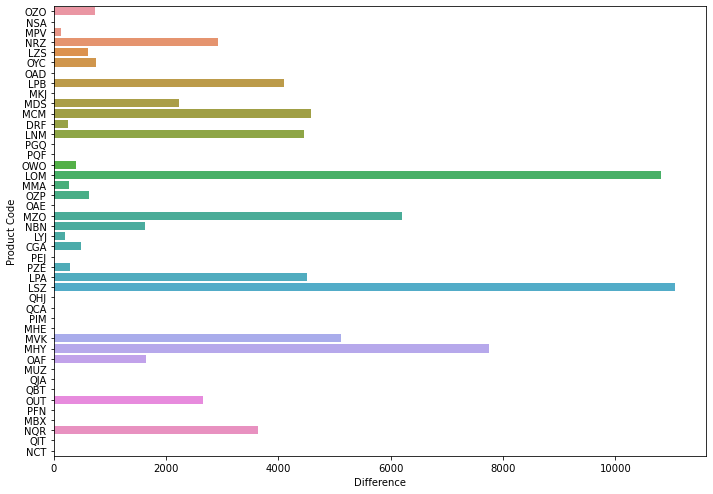

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize']=11.7,8.27
sns.barplot(x=datedf["Difference"], y=datedf["Product Code"])

In [141]:
genericUnique=unique_ped_pma.generic_name.unique()
datedf["Generic"] = genericUnique

In [14]:
import seaborn as sns
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })


set_style()


In [142]:
gapDateDf = datedf[datedf.Difference!=0].reset_index(drop=True)


In [40]:
index = ['Middle Ear Hearing Implant, Partially Implanted',
       'Autonomic Nerve Stimulator, Implanted for Epilepsy',
       'Electrode Recording Catheter or Probe',
       'Fetal Pulse Oximeter',
       'Invasive Glucose Sensor, Non-Adjunctive',
       'Drug-eluting Sinus Stent', 'Glucose Oxidase',
       'Excimer Laser System',
       'Automated Insulin Dosing, Single Hormonal Control',
       'Automated Insulin Dosing , Threshold Suspend',
       'Insulin Infusion Pump With Invasive Glucose Sensor',
       'Shock-Wave Generator For Pain Relief',
       'Middle Ear Hearing Implant, Totally Implanted',
       'Invasive Glucose Sensor', 'Intracranial Aneurysm Flow Diverter',
       'Ablation System, High Intensity Focused Ultrasound, MR-guided',
       'Dural Sealant', 'Percutaneous Cathether Ablation',
       'Injectable Bulking Agent for Gastro-Urology Use',
       'Esophageal Pacing system', 'Cochlear Implant',
       'Wearable Automated External Defibrillator',
       'ELISA Hepatitis C virus',
       'Implanted Electrical Stimulator for Parkinsonian Tremor',
       'Hepatitis B Test',
       'High Frequency ventilator']

In [37]:
index.reverse()

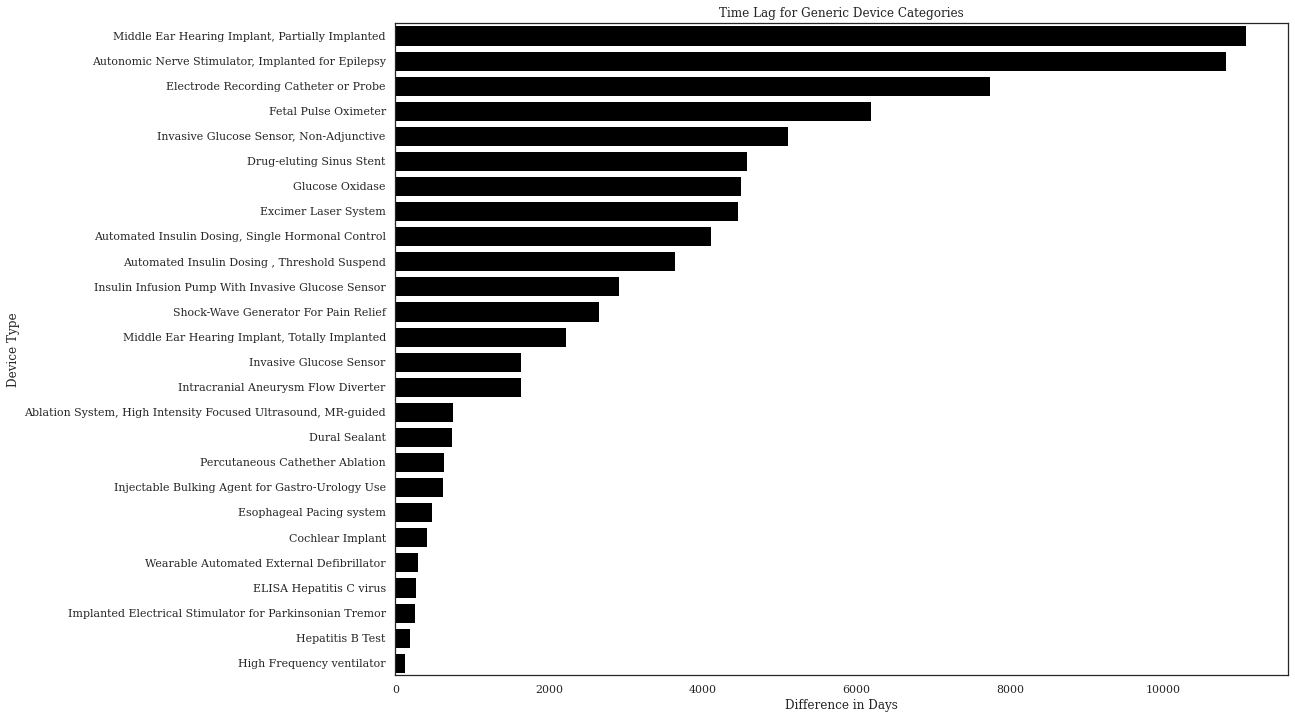

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

gapDateDf = datedf[datedf.Difference!=0].reset_index(drop=True)
gapDateDf.loc[8:9,"Generic"] = gapDateDf.loc[8:9,"Generic"].str.capitalize()
gapDateDf.loc[16:17,"Generic"] = gapDateDf.loc[16:17,"Generic"].str.capitalize()
gapDateDf.loc[19:20,"Generic"] = gapDateDf.loc[19:20,"Generic"].str.capitalize()

rcParams['figure.figsize']=16, 12
ax =sns.barplot(x=gapDateDf["Difference"].sort_values(ascending=False), y=index, color = "black")


#order=gapDateDf.sort_values('Difference',  ascending = False).Generic
ax.set(xlabel = "Difference in Days", ylabel = "Device Type", title = "Time Lag for Generic Device Categories")
plt.savefig('Figures/TimeLag_GenericDevice.pdf', format = 'pdf', dpi = 1200)


In [145]:
gapDateDf.head()

,Product Code,First_Date,Ped_date,DifferenceDays,Difference,Generic
0,OZO,2013-09-26,2015-10-02,736,736,"Automated insulin dosing , threshold suspend"
1,MPV,2000-08-31,2001-01-03,125,125,"Implant, hearing, active, middle ear, partiall..."
2,NRZ,2004-10-22,2012-10-18,2918,2918,"Ablation system, high intensity focused ultras..."
3,LZS,1995-03-10,1996-11-15,616,616,Excimer laser system
4,LPB,1994-10-28,2006-01-26,4108,4108,Cardiac ablation percutaneous catheter


In [52]:
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
#mdates.date2num(gapDateDf["First_Date"].to_datetime())


mdates.date2num(datetime.strptime(gapDateDf["First_Date"][0], '%Y-%m-%d'))


735137.0

In [152]:
data =gapDateDf

data["First_Date"] = pd.to_datetime(data["First_Date"])
data["Ped_date"] = pd.to_datetime(data["Ped_date"])


In [150]:
gapDateDf.sort_values("Difference")["Generic"].values

array(['Implant, hearing, active, middle ear, partially implanted',
       'CATHETER, ELECTRODE RECORDING, OR PROBE, ELECTRODE RECORDING',
       'STIMULATOR, AUTONOMIC NERVE, IMPLANTED FOR EPILEPSY',
       'Oximeter, fetal pulse',
       'Sensor, glucose, invasive, non-adjunctive, factory-calibrated, user-initiated',
       'GLUCOSE OXIDASE, GLUCOSE', 'Drug-eluting sinus stent',
       'Excimer laser system',
       'Automated insulin dosing , threshold suspend',
       'Generator, shock-wave, for pain relief',
       'Implant, hearing, active, middle ear, totally implanted',
       'Sensor, glucose, invasive', 'Intracranial aneurysm flow diverter',
       'Ablation system, high intensity focused ultrasound (HIFU), MR-guided',
       'Sealant, dural', 'Cardiac ablation percutaneous catheter',
       'AGENT, BULKING, INJECTABLE FOR GASTRO-UROLOGY USE',
       'SYSTEM, ESOPHAGEAL PACING', 'Implant, cochlear',
       'Wearable automated external defibrillator',
       'Stimulator, elect

In [162]:
Reindex = ['Middle Ear Hearing Implant, Partially Implanted',
         'Electrode Recording Catheter or Probe',
       'Autonomic Nerve Stimulator, Implanted for Epilepsy',
       'Fetal Pulse Oximeter',
       'Invasive Glucose Sensor, Non-Adjunctive',
           'Glucose Oxidase',
       'Drug-eluting Sinus Stent',
       'Excimer Laser System',
       'Automated Insulin Dosing , Threshold Suspend',
       'Shock-Wave Generator For Pain Relief',
       'Middle Ear Hearing Implant, Totally Implanted',
         'Invasive Glucose Sensor',
         'Intracranial Aneurysm Flow Diverter',
                'Ablation System, High Intensity Focused Ultrasound, MR-guided',
       'Dural Sealant', 'Percutaneous Cathether Ablation',
       'Injectable Bulking Agent for Gastro-Urology Use',
       'Esophageal Pacing system', 'Cochlear Implant',
       'Wearable Automated External Defibrillator',
       'Implanted Electrical Stimulator for Parkinsonian Tremor',
       'Hepatitis B Test',
       'High Frequency ventilator']

In [163]:
new_data = data.sort_values("Difference").reset_index(drop=True)

In [164]:
new_data["Device Type"] = Reindex

new_data =  new_data.sort_values("First_Date").reset_index(drop=True)

In [165]:
clinicalSpecialty=[]

for i in range(len(new_data)):
    code = new_data.iloc[i]["Product Code"]
    
    clinic = pma[pma["product_code"]==code]["advisory_committee_description"].unique()
    if len(clinic==1):
        clinicalSpecialty.append(clinic[0])
    else:
        print("uh oh")



In [166]:
new_data["Clinical Specialty"]=clinicalSpecialty

In [167]:
new_data

,Product Code,First_Date,Ped_date,DifferenceDays,Difference,Generic,Device Type,Clinical Specialty
0,LOM,1980-03-17,2004-03-04,10809,8753,"Test, hepatitis b (b core, be antigen, be anti...",Hepatitis B Test,Microbiology
1,MCM,1984-11-26,1997-06-11,4580,4580,"Implant, cochlear",Cochlear Implant,"Ear, Nose, Throat"
2,LPA,1986-04-30,1998-08-28,4503,4503,"SYSTEM, ESOPHAGEAL PACING",Esophageal Pacing system,Cardiovascular
3,LSZ,1988-06-30,2018-10-19,11068,11068,"VENTILATOR, HIGH FREQUENCY",High Frequency ventilator,Anesthesiology
4,LNM,1993-09-30,2005-12-12,4456,4456,"AGENT, BULKING, INJECTABLE FOR GASTRO-UROLOGY USE",Injectable Bulking Agent for Gastro-Urology Use,"Gastroenterology, Urology"
5,LPB,1994-10-28,2006-01-26,4108,4108,Cardiac ablation percutaneous catheter,Percutaneous Cathether Ablation,Cardiovascular
6,LZS,1995-03-10,1996-11-15,616,616,Excimer laser system,Excimer Laser System,Ophthalmic
7,LYJ,1997-07-16,1998-01-29,197,197,"STIMULATOR, AUTONOMIC NERVE, IMPLANTED FOR EPI...","Autonomic Nerve Stimulator, Implanted for Epil...",Neurology
8,MHY,1997-07-31,2018-10-12,7743,7743,"Stimulator, electrical, implanted, for parkins...",Implanted Electrical Stimulator for Parkinsoni...,Neurology
9,DRF,1998-07-22,1999-01-26,257,188,"CATHETER, ELECTRODE RECORDING, OR PROBE, ELECT...",Electrode Recording Catheter or Probe,Cardiovascular


In [169]:
import altair as alt

#sort=alt.EncodingSortField(field="Letters", op="count", order='ascending')
chart =alt.Chart(new_data).mark_bar().encode(
    x=alt.X('First_Date', title = "Date"),
    x2='Ped_date',
    y=alt.Y('Device Type', sort = alt.EncodingSortField(field="First_Date", order = "ascending")),
    color = alt.Color("Clinical Specialty")
    #color=alt.Color('Device Type', scale=alt.Scale(scheme='dark2'))
).configure_axis(
    grid=False
).properties(
title="Timeline of PMA Approvals for Medical Devices"
)


#chart.configure_axis(labelLimit=260)

chart.configure_axisY(labelLimit=400)
chart.configure_title(fontSize=16)
#chart.configure_axis(labelFontSize=14)
#chart.configure_axisX(labelFontSize=10)


alt.Chart(...)

In [170]:
import altair as alt

#sort=alt.EncodingSortField(field="Letters", op="count", order='ascending')
chart =alt.Chart(new_data).mark_bar().encode(
    x=alt.X('First_Date', title = "Date"),
    x2='Ped_date',
    y=alt.Y('Device Type', sort = alt.EncodingSortField(field="First_Date", order = "ascending")),
    color = alt.Color("Clinical Specialty")
    #color=alt.Color('Device Type', scale=alt.Scale(scheme='dark2'))
).configure_axis(
    grid=False
).properties(
title="Timeline of PMA Approvals for Medical Devices"
)


#chart.configure_axis(labelLimit=260)

chart.configure_axisY(labelLimit=400)
#chart.configure_title(fontSize=16)
#chart.configure_axis(labelFontSize=14)
#chart.configure_axisX(labelFontSize=10)


alt.Chart(...)

In [39]:
unique_ped_pma[unique_ped_pma.generic_name == "Excimer laser system"]["advisory_committee_description"].unique()[0]

'Ophthalmic'

In [24]:
specialties=[]
for i in range(len(datedf)):
    specialties.append(unique_ped_pma[unique_ped_pma.generic_name == datedf.iloc[i].Generic]["advisory_committee_description"].unique()[0])
    
    

In [25]:
datedf["Specialty"] = specialties

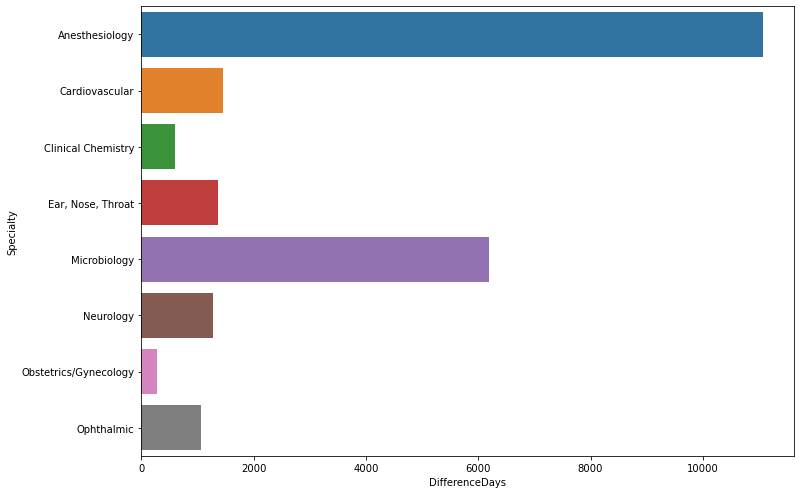

In [26]:
specialtyDate = datedf.groupby("Specialty")["DifferenceDays"].mean()
sns.barplot(specialtyDate, specialtyDate.index)

In [27]:
datedf.groupby("Specialty")["DifferenceDays"].std()

Specialty
Anesthesiology                   NaN
Cardiovascular           2301.156014
Clinical Chemistry        734.605239
Ear, Nose, Throat        2180.938254
Microbiology                     NaN
Neurology                2049.363885
Obstetrics/Gynecology            NaN
Ophthalmic                       NaN
Name: DifferenceDays, dtype: float64

In [28]:
datedf.groupby("Specialty")["DifferenceDays"].median()

Specialty
Anesthesiology           11068.0
Cardiovascular             257.0
Clinical Chemistry         555.5
Ear, Nose, Throat          455.0
Microbiology              6194.0
Neurology                  197.0
Obstetrics/Gynecology      273.0
Ophthalmic                1056.0
Name: DifferenceDays, dtype: float64

In [30]:
datedf["Specialty"].value_counts()

Clinical Chemistry       8
Ear, Nose, Throat        4
Cardiovascular           3
Neurology                3
Anesthesiology           1
Microbiology             1
Ophthalmic               1
Obstetrics/Gynecology    1
Name: Specialty, dtype: int64